In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('termdeposit_train.csv')

In [3]:
df1 = pd.read_csv('termdeposit_test.csv')

In [4]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [5]:
df1.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [6]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: ID, Length: 31647, dtype: int64


32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64


blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


no     31062
yes      585
Name: default, dtype: int64


 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722  

In [7]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: ID, Length: 31647, dtype: int64


32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64


blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


no     31062
yes      585
Name: default, dtype: int64


 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722  

In [8]:
print(df1.shape) 
print(df.shape) 

(13564, 17)
(31647, 18)


In [9]:
#can see data diffresnce beetween df an df1

In [10]:
#lets preprocess df 

In [11]:
df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [12]:
#lets check null value

df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [13]:
#no null value

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [15]:
for column in df.columns:
    print(column,df[column].nunique())


ID 31647
age 76
job 12
marital 3
education 4
default 2
balance 6326
housing 2
loan 2
contact 3
day 31
month 12
duration 1454
campaign 45
pdays 509
previous 38
poutcome 4
subscribed 2


In [16]:
#id has same no as data , balance and duration has high diffrent data

In [17]:
cat_cols = df.select_dtypes(include=['object']).columns.to_list()
num_cols = df.select_dtypes(include=['int','float64']).columns.to_list()

In [18]:
cat_cols 

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'subscribed']

In [19]:
num_cols 

['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [20]:
for feature in cat_cols:
    print(feature,len(df[feature].unique()))

job 12
marital 3
education 4
default 2
housing 2
loan 2
contact 3
month 12
poutcome 4
subscribed 2


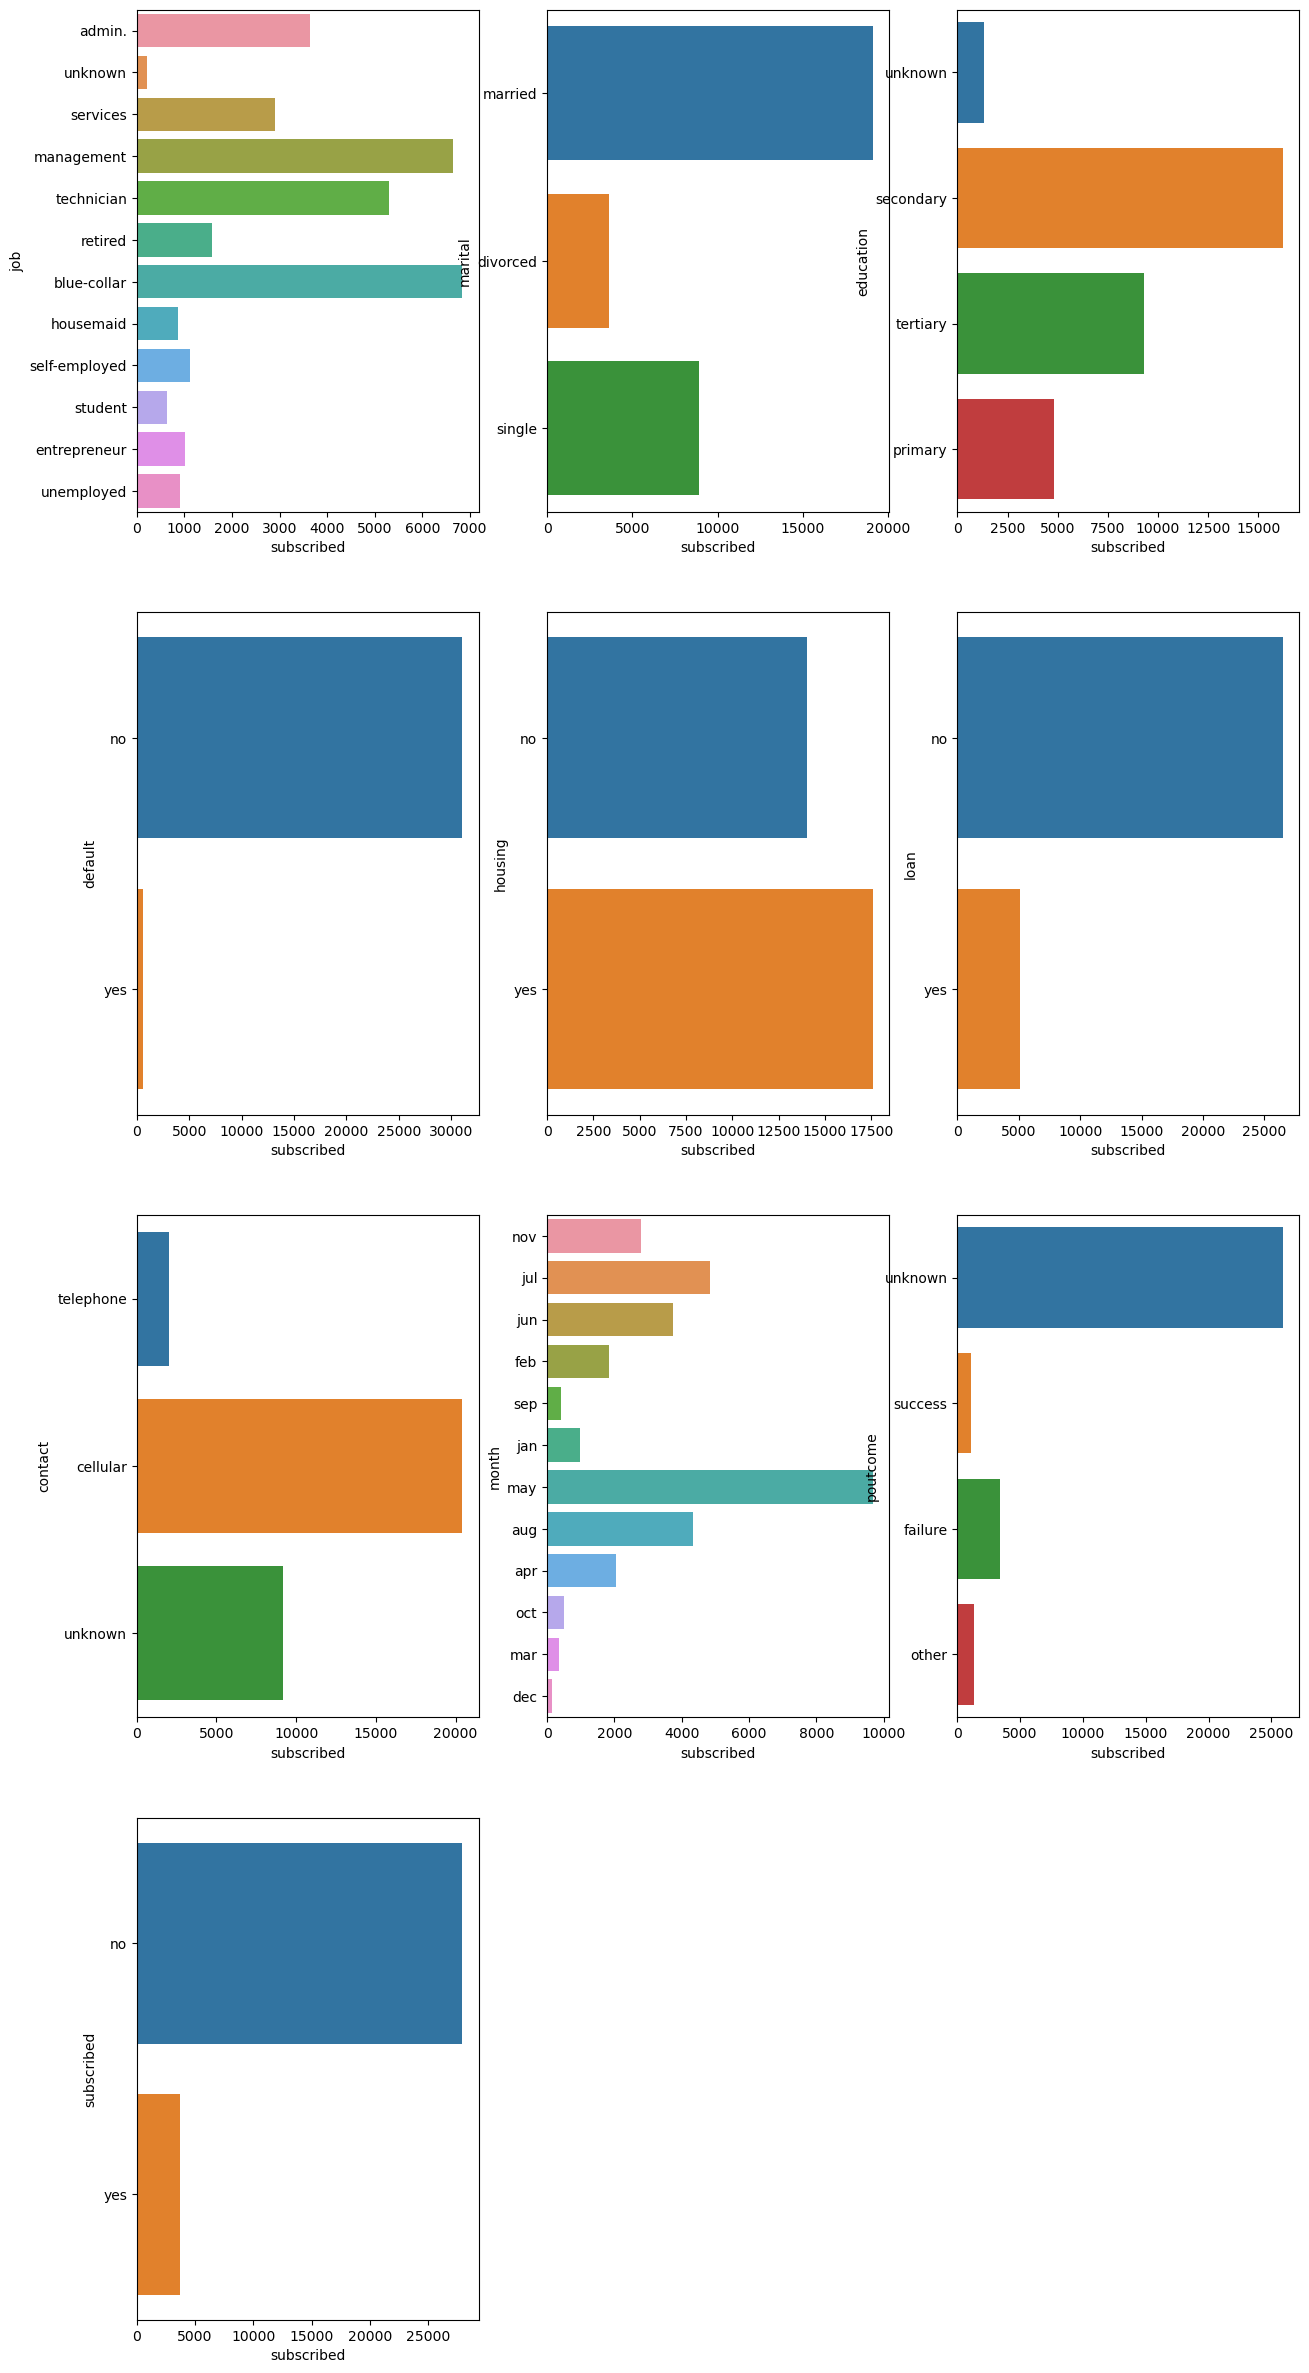

In [21]:
plt.figure(figsize=(15,30))
p = 1
for cats in cat_cols:
    
    if p<=13:
        plt.subplot(4,3,p)
        sns.countplot(y=cats,data=df)
        plt.xlabel(i)
        
    p+=1
plt.show()

In [22]:
#we can see variation for the subscription to diffrent diffrent column criteria all seems relatabl - dropping none

In [23]:
#dropping id as same legth of data

In [24]:
df.drop('ID',axis=1,inplace=True)

In [25]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [26]:
#now encode the data

In [27]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()


In [28]:
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'subscribed']

In [29]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [30]:
df[cat_cols] = df[cat_cols].apply(lambda x: label_encoder.fit_transform(x.astype(str)))

In [31]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3,0
31643,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3,1
31644,32,4,2,2,0,312,0,0,0,7,1,37,3,-1,0,3,0
31645,57,9,1,1,0,225,1,0,1,15,8,22,7,337,12,0,0


In [32]:
# encoded the data

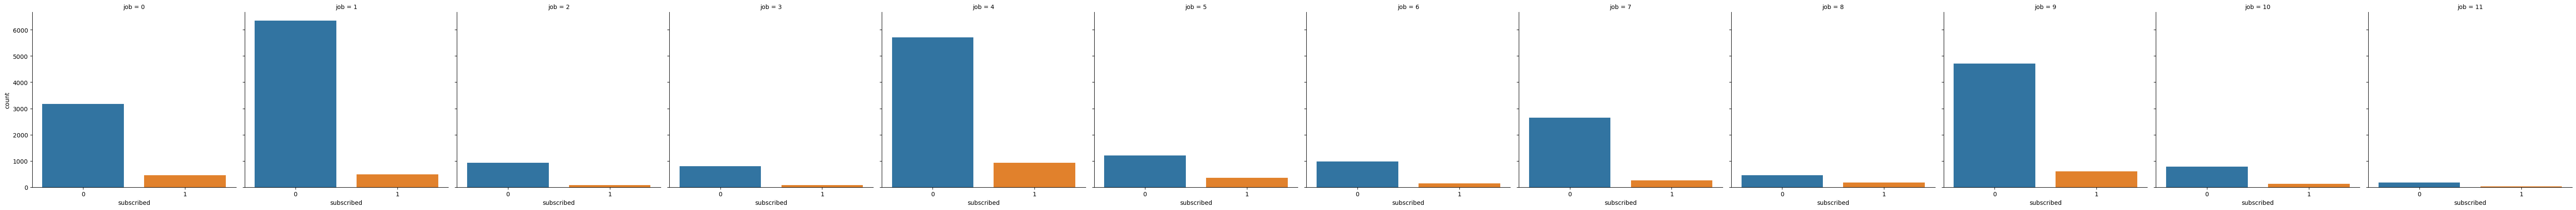

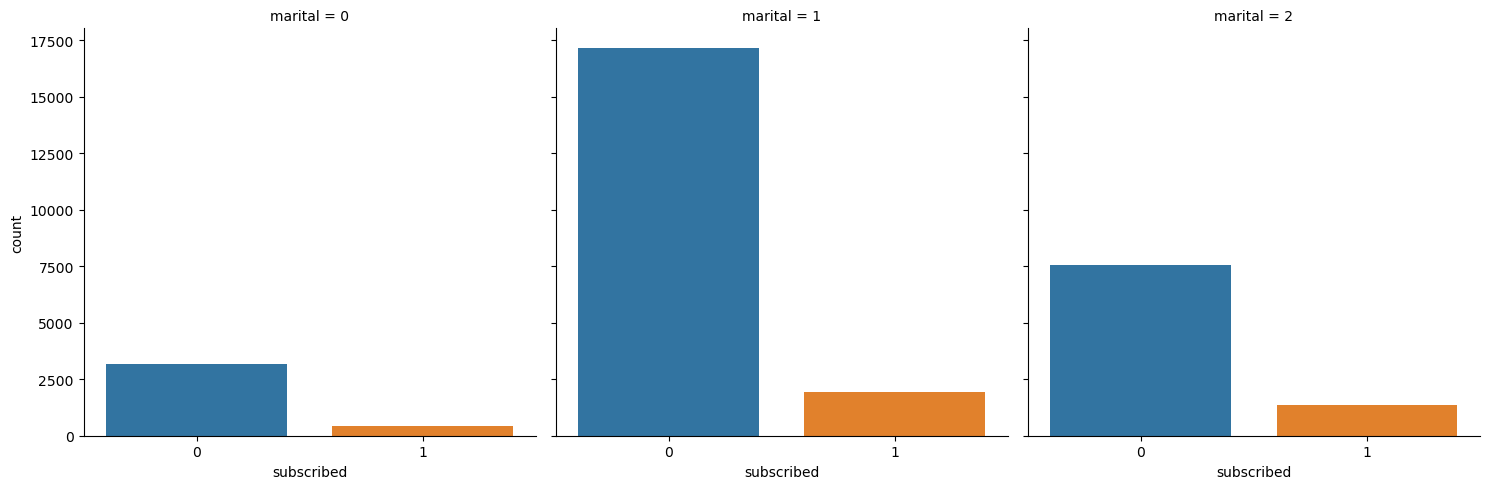

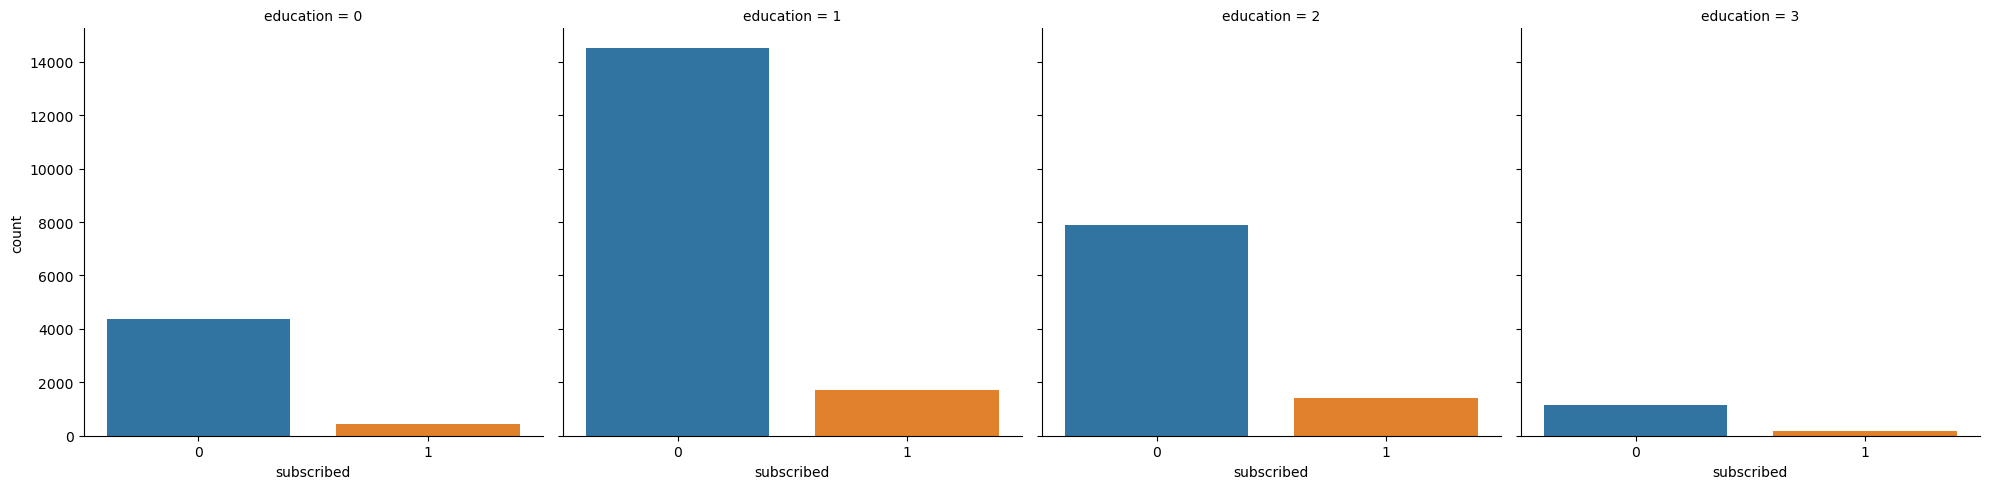

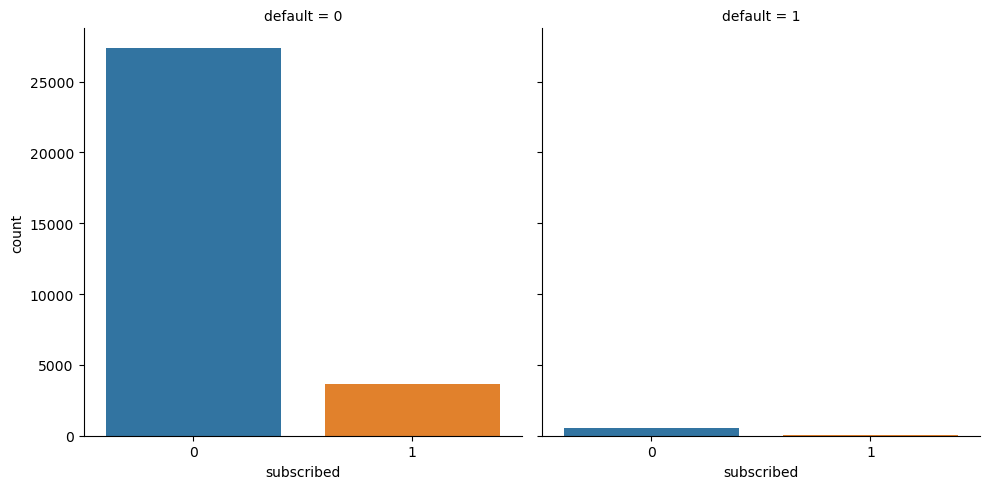

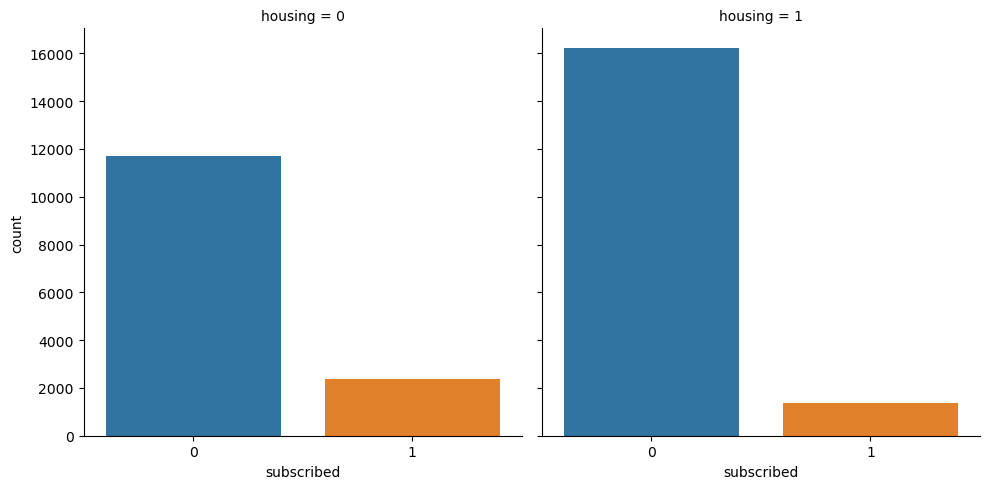

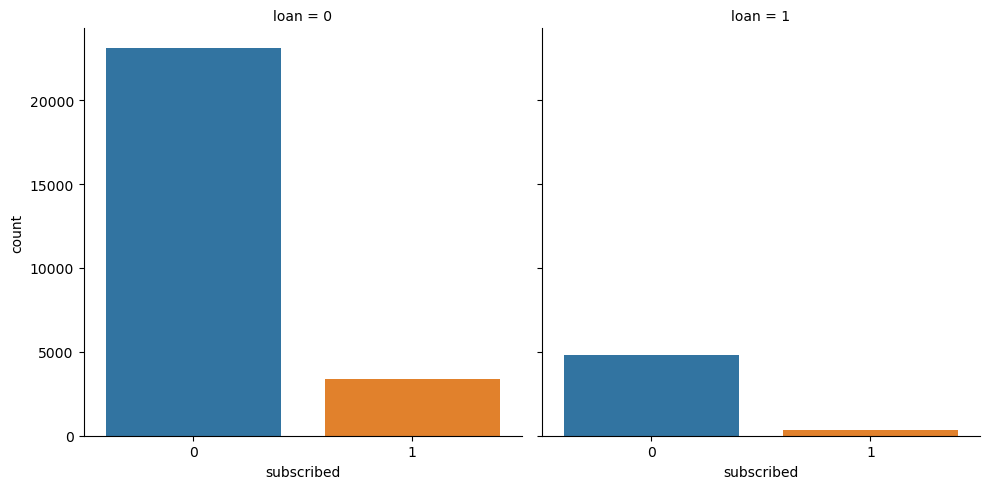

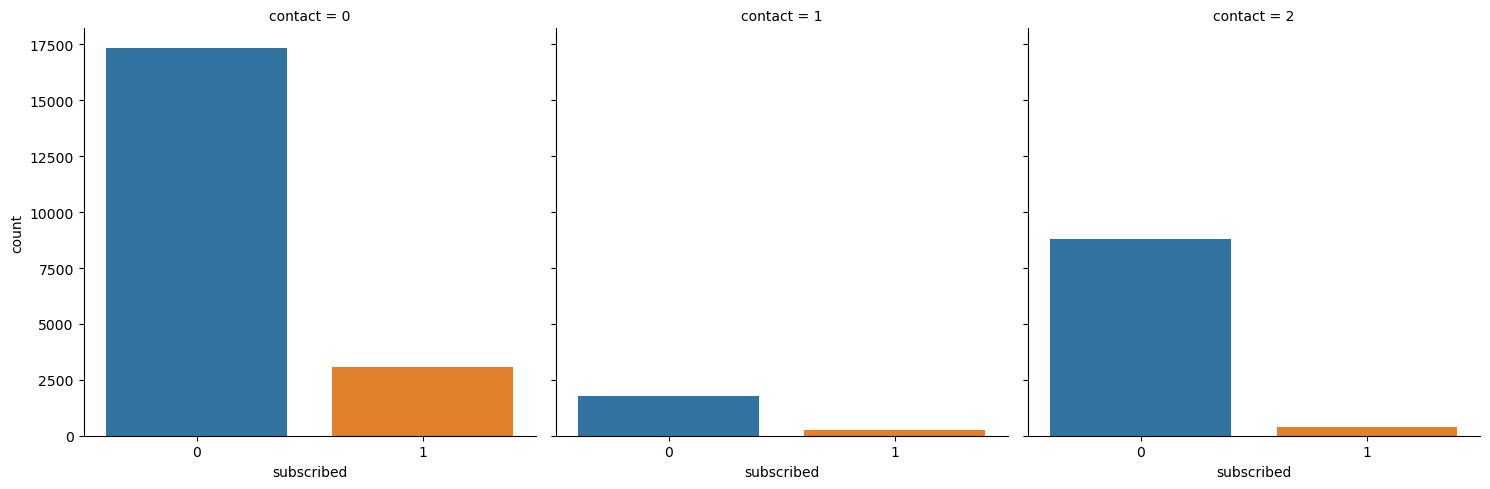

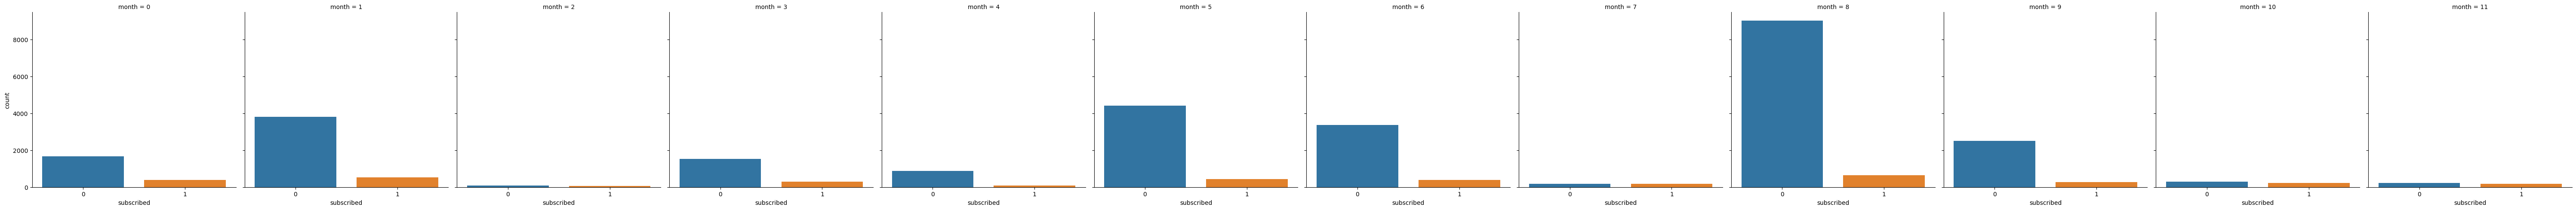

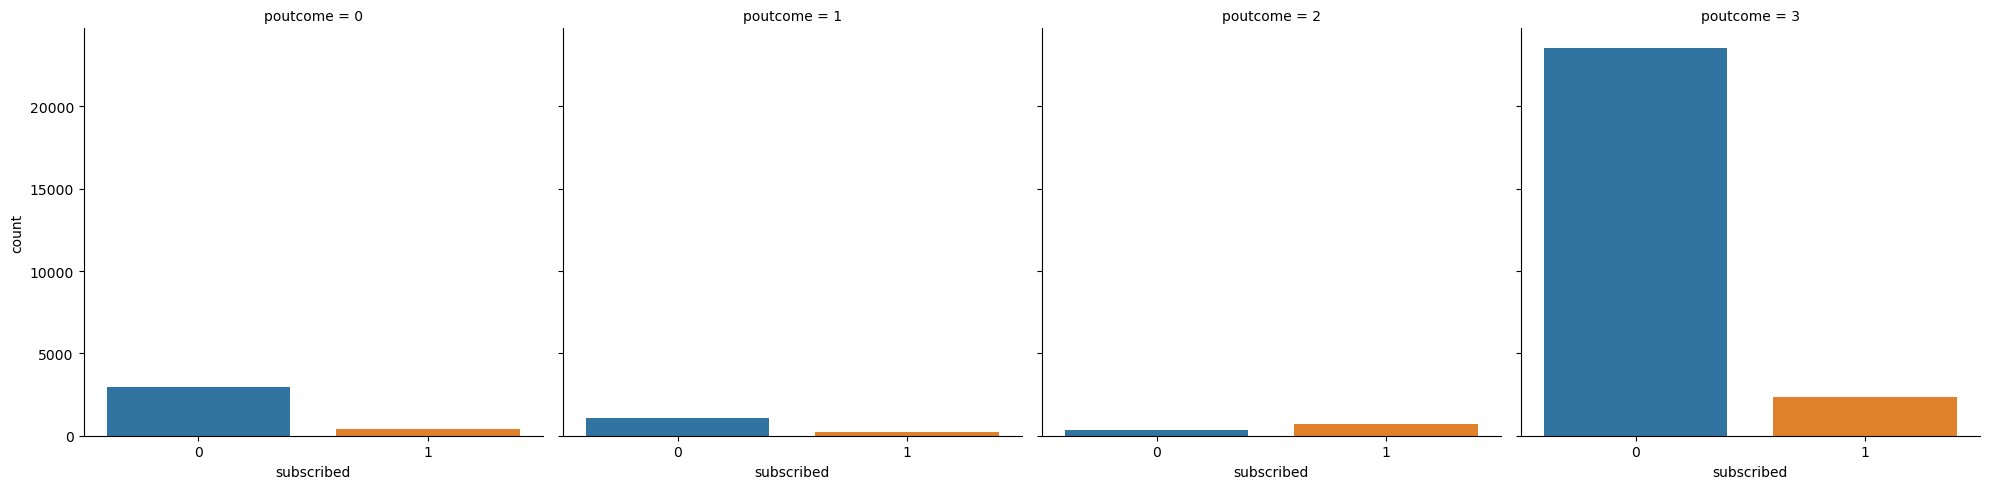

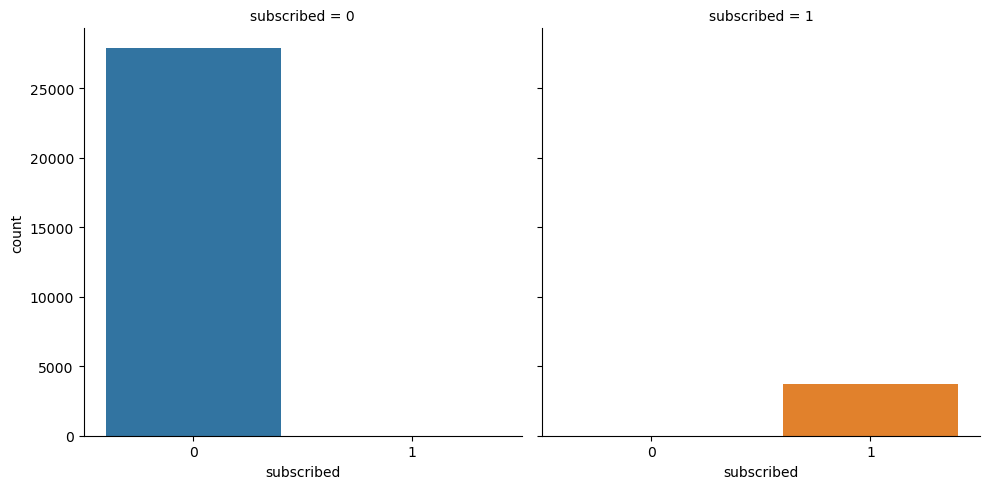

In [33]:
for cats in cat_cols:
    sns.catplot(x= 'subscribed',data = df,col=cats,kind='count')
    
plt.show()

In [34]:
num_cols.remove('ID')

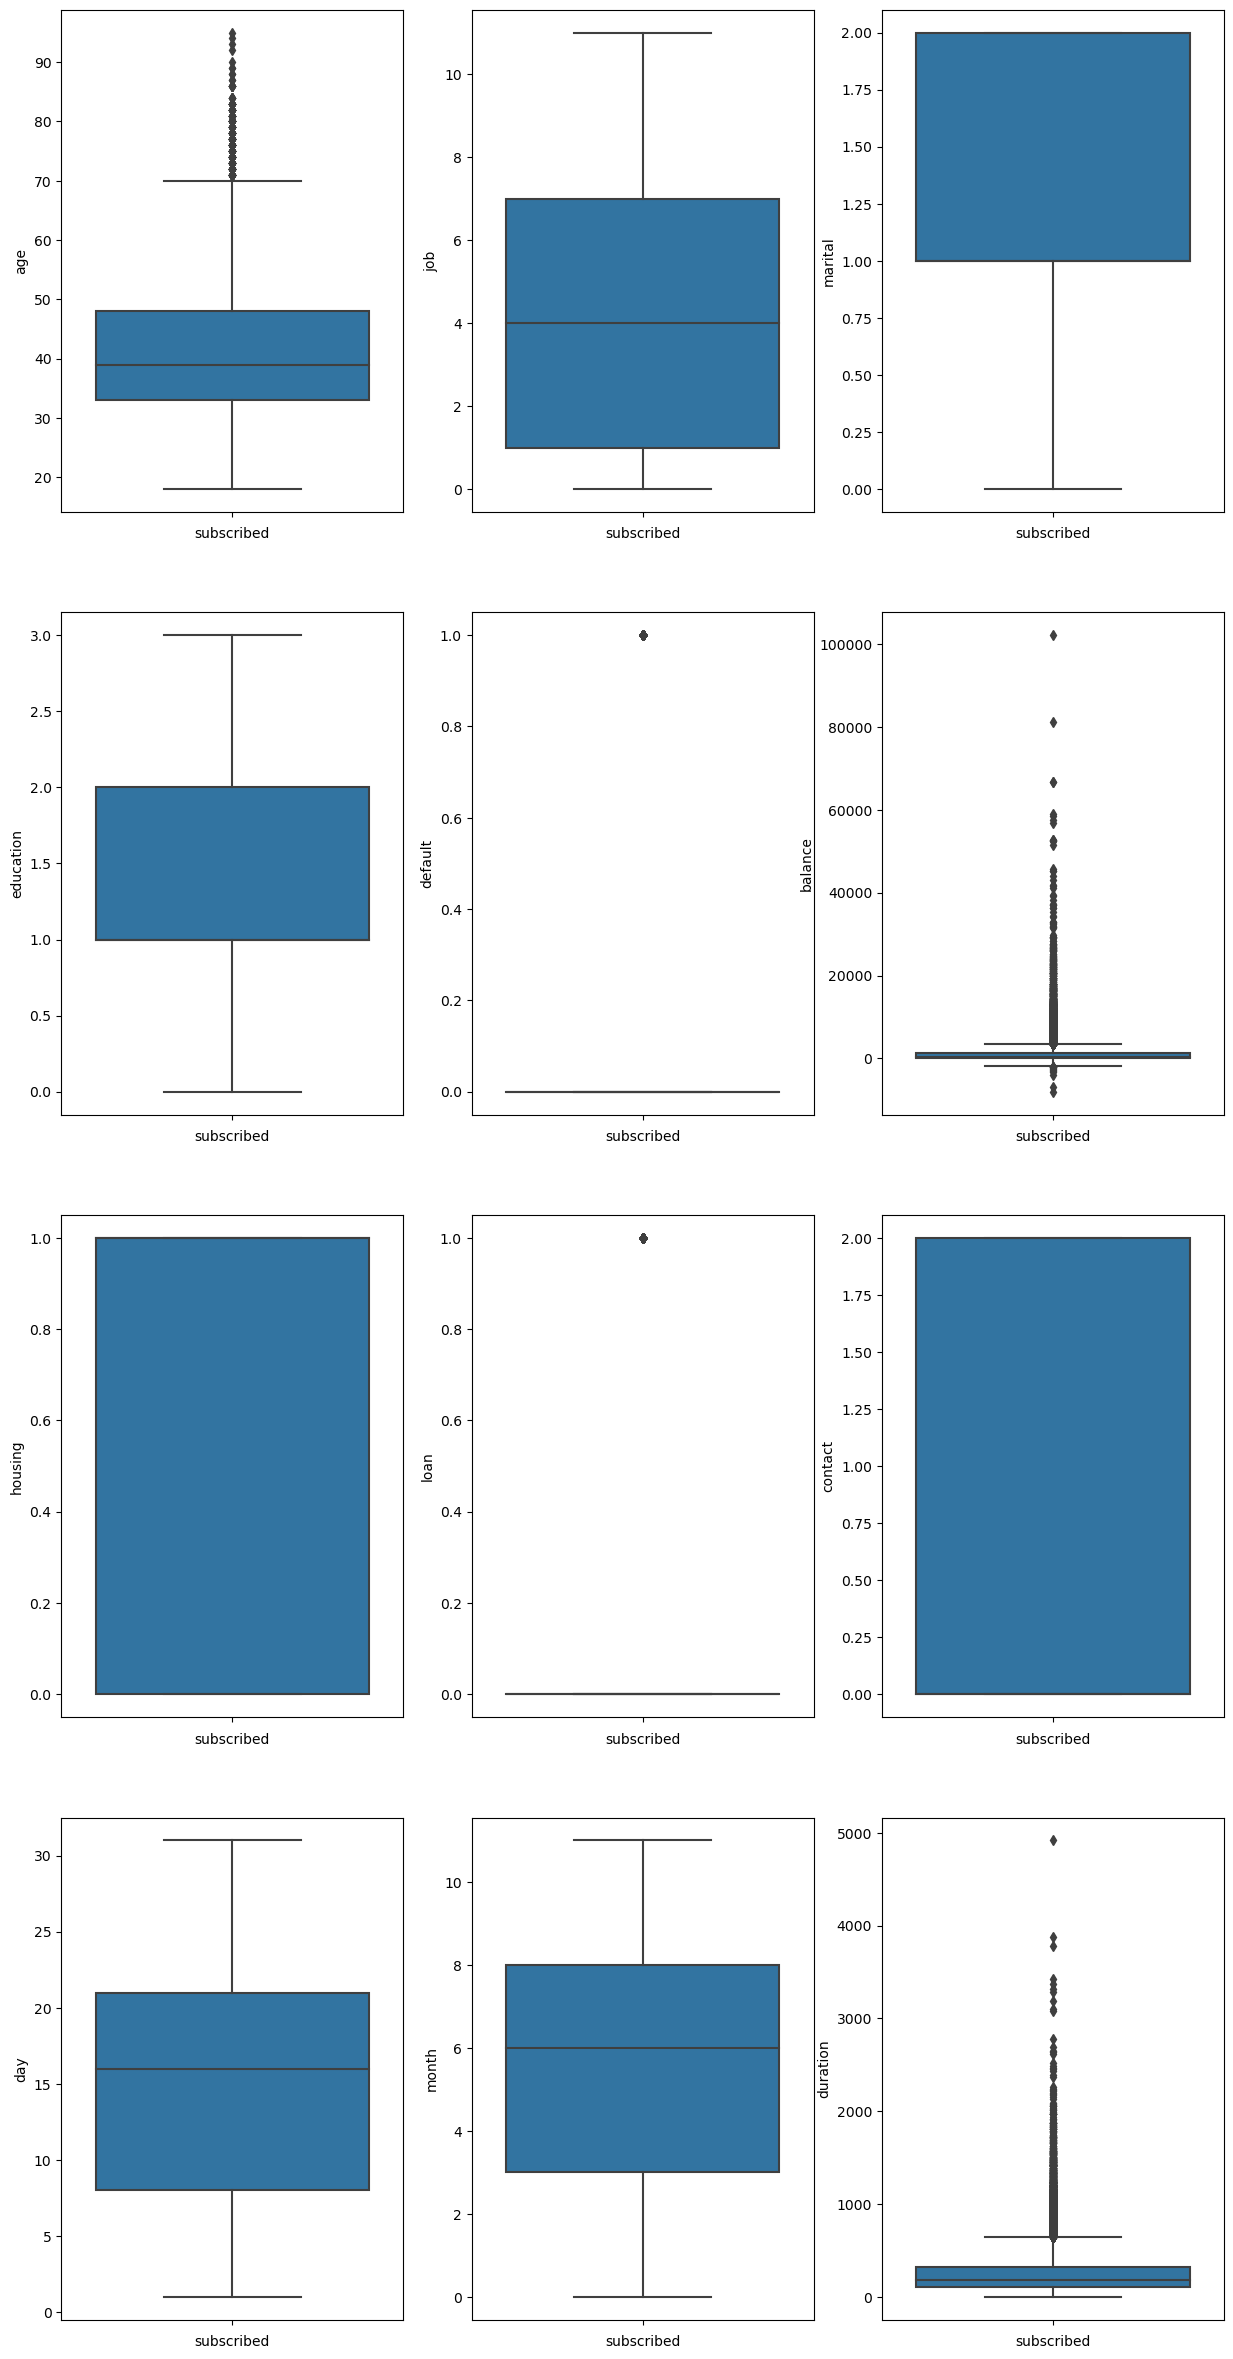

In [35]:
plt.figure(figsize=(15,30))
p = 1
for cats in df.columns:
    
    if p<=12:
        plt.subplot(4,3,p)
        sns.boxplot(y=cats,data=df)
        plt.xlabel(i)
        
    p+=1
plt.show()

In [36]:
#have outliers but not removing seems a valid outliers

In [37]:
df.skew()

age            0.681607
job            0.264817
marital       -0.100071
education      0.199441
default        7.149903
balance        7.995696
housing       -0.223918
loan           1.833474
contact        0.758602
day            0.087185
month         -0.486498
duration       3.199766
campaign       4.873935
pdays          2.642374
previous      49.302348
poutcome      -1.996421
subscribed     2.377445
dtype: float64

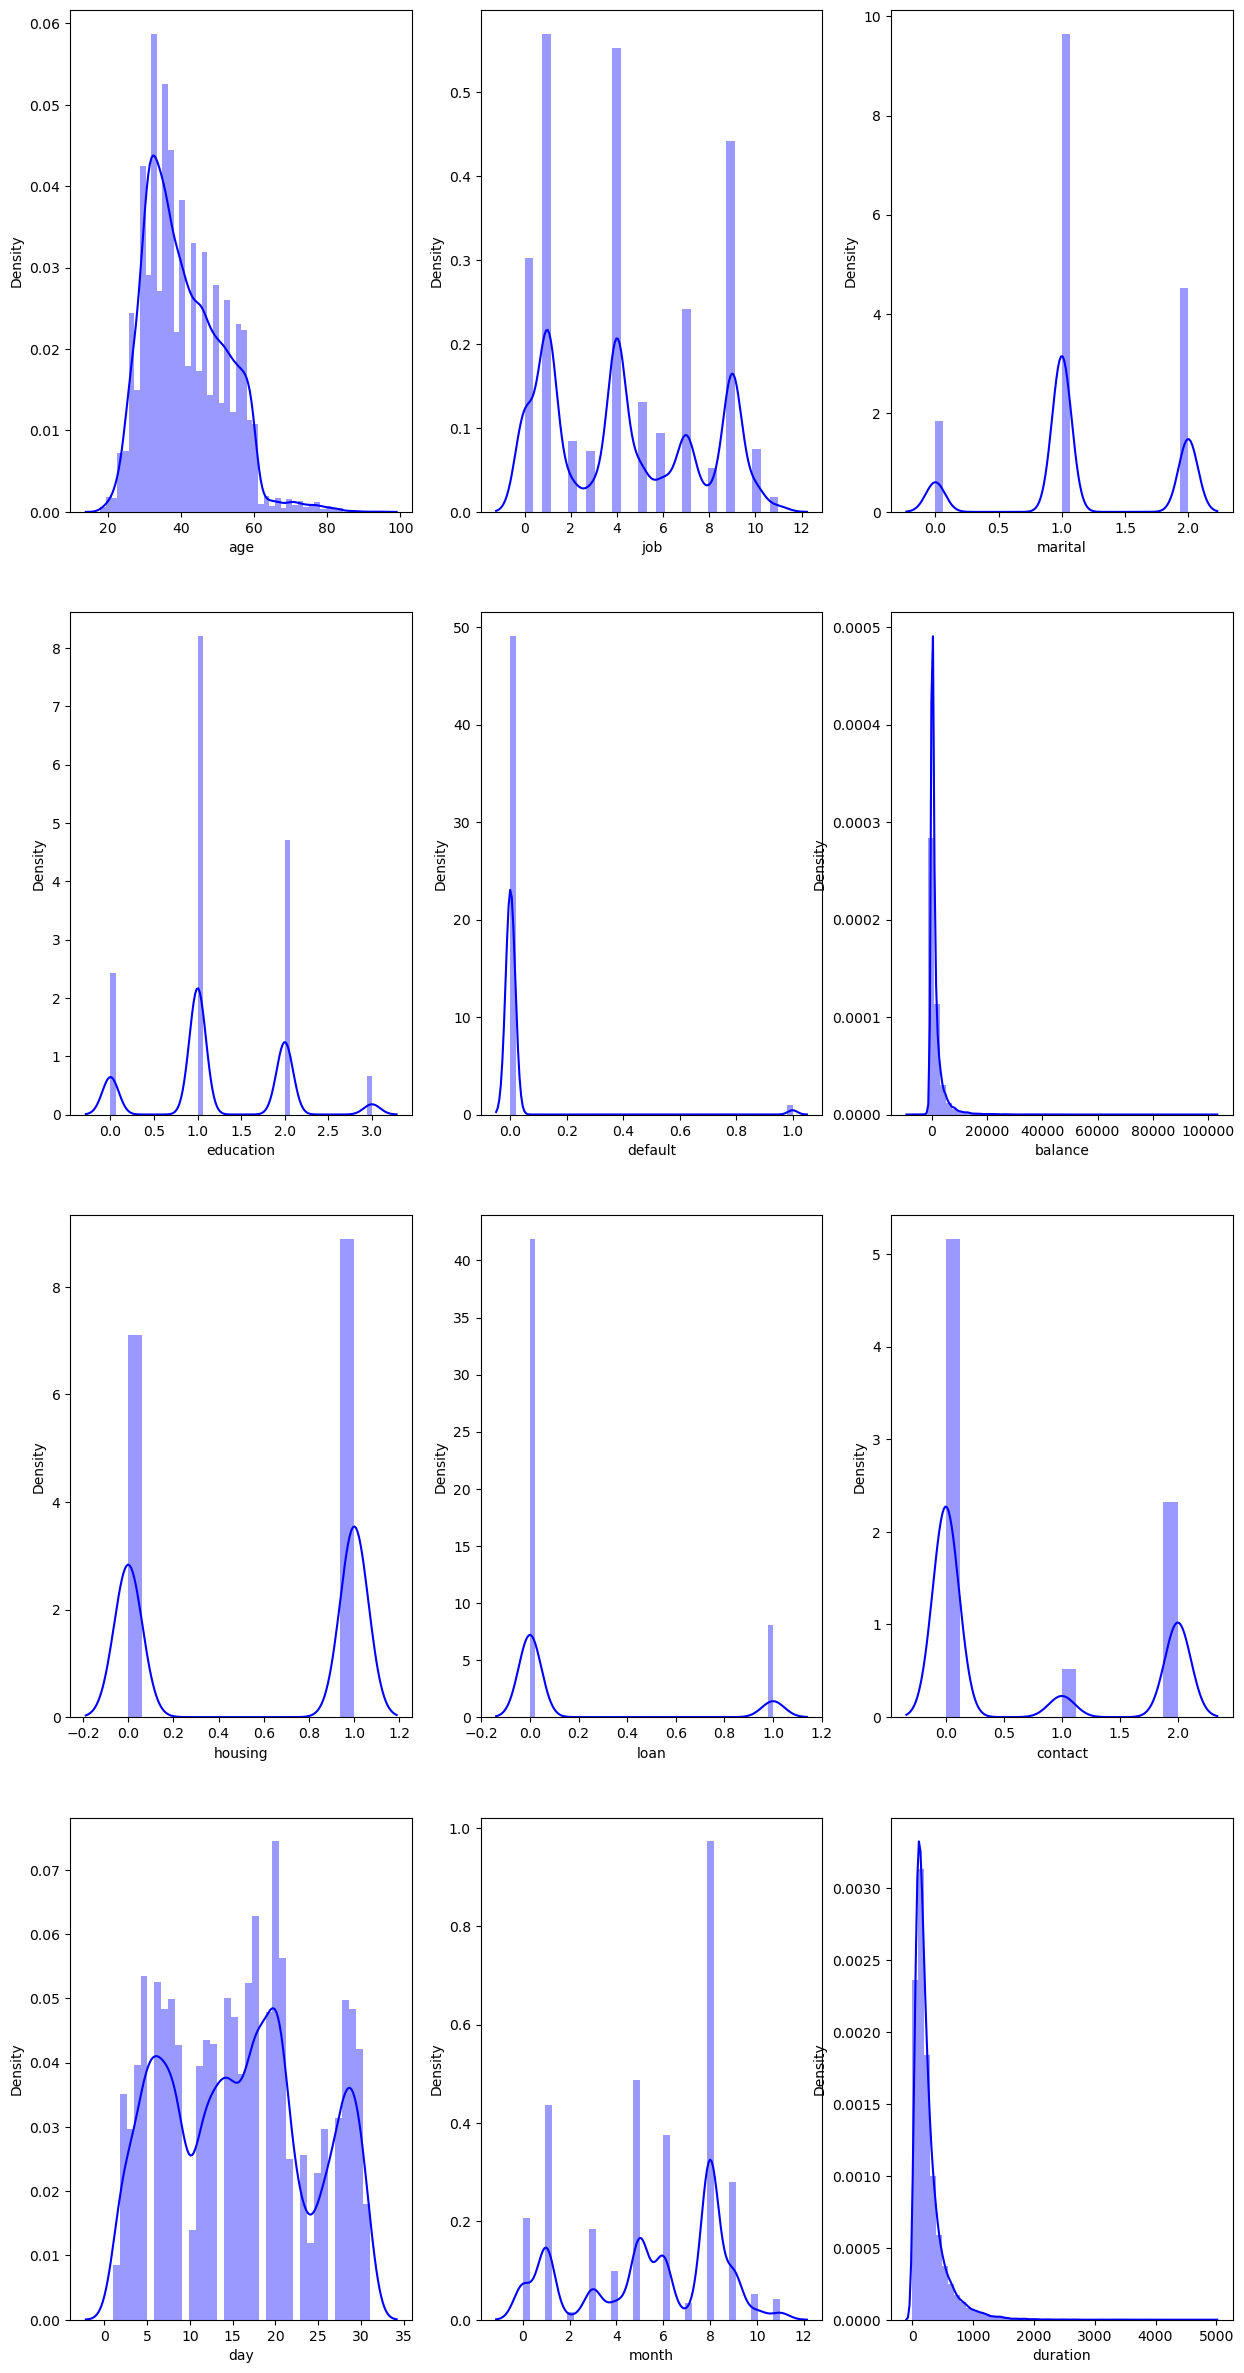

In [38]:
plt.figure(figsize=(15,30))
p = 1
for i in df:
    
    if p<=12:
        plt.subplot(4,3,p)
        sns.distplot(df[i], color='blue')
        plt.xlabel(i)
        
    p+=1
plt.show()

In [39]:
#can see data has skewness

In [40]:
#data is skewd not removing skewness


In [41]:
X = df.drop('subscribed', axis=1)
y = df['subscribed']

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score,f1_score,recall_score

In [44]:
df1.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [45]:
cat_cols1 = df1.select_dtypes(include=['object']).columns.to_list()
num_cols1 = df1.select_dtypes(include=['int','float64']).columns.to_list()

In [46]:
df1[cat_cols1] = df1[cat_cols1].apply(lambda x: label_encoder.fit_transform(x.astype(str)))

In [47]:
df1

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,7,1,1,0,118,1,0,0,15,8,20,6,-1,0,3
1,40403,78,5,0,0,0,2787,0,0,1,1,5,372,1,-1,0,3
2,3709,31,6,2,2,0,144,1,0,2,16,8,676,1,-1,0,3
3,37422,57,7,2,0,0,3777,1,0,1,13,8,65,2,-1,0,3
4,12527,45,1,0,1,0,-705,0,1,2,3,5,111,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,4,1,2,0,45,0,0,0,28,1,148,4,-1,0,3
13560,11743,54,1,1,0,0,2281,1,0,2,20,6,158,1,-1,0,3
13561,28292,35,5,1,0,0,285,1,0,0,29,4,136,1,-1,0,3
13562,45163,29,0,2,1,0,464,0,0,0,9,9,208,2,91,3,2


In [48]:
df1.drop('ID',axis=1,inplace=True)

In [49]:
Scaler =  StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.fit_transform(df1)
X_val =  Scaler.fit_transform(X_val)

In [50]:
maxaccu = 0
maxrs = 0

for i in range(1,200):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=i)
    LR = LogisticRegression()
    LR.fit(X_train,y_train)
    predictions = LR.predict(X_val)
    acc=accuracy_score(y_val,predictions)
    if acc>maxaccu:
        maxaccu=acc
        maxrs =i
print('max acc is',maxaccu,'on r state',maxrs)

max acc is 0.89826224328594 on r state 51


In [51]:
 X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=maxrs)

In [52]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_val)
accuracy_score(y_val,predictions)
print(classification_report(y_val,predictions))
print(confusion_matrix(y_val,predictions))
accuracy_score(y_val,predictions)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5637
           1       0.62      0.18      0.28       693

    accuracy                           0.90      6330
   macro avg       0.76      0.58      0.61      6330
weighted avg       0.88      0.90      0.87      6330

[[5561   76]
 [ 568  125]]


0.89826224328594

In [53]:
predictions1 = logmodel.predict(X_test)


In [54]:
predictions_df = pd.DataFrame({'Predictions': predictions1})
predictions_df.to_csv('test_predictions.csv', index=False)

In [55]:
predictions_df

,Predictions
0,0
1,1
2,0
3,0
4,0
...,...
13559,1
13560,0
13561,1
13562,1


In [56]:
predictions_df.value_counts()

Predictions
0              7518
1              6046
dtype: int64

In [57]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)
accuracy_score(y_val,y_pred)
print(classification_report(y_val,y_pred))
print(confusion_matrix(y_val,y_pred))
accuracy_score(y_val,y_pred)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      5637
           1       0.60      0.00      0.01       693

    accuracy                           0.89      6330
   macro avg       0.75      0.50      0.48      6330
weighted avg       0.86      0.89      0.84      6330

[[5635    2]
 [ 690    3]]


0.8906793048973144

In [58]:
predictions2 = classifier.predict(X_test)
predictions_df1 = pd.DataFrame({'Predictions': predictions2})
predictions_df1.to_csv('test_predictions.csv1', index=False)
predictions_df1

,Predictions
0,0
1,0
2,0
3,0
4,0
...,...
13559,0
13560,0
13561,0
13562,0


In [59]:
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier()
classifier1.fit(X_train, y_train)
y_pred1 = classifier1.predict(X_val)
accuracy_score(y_val,y_pred1)
print(classification_report(y_val,y_pred1))
print(confusion_matrix(y_val,y_pred1))
accuracy_score(y_val,y_pred1)

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      5637
           1       0.45      0.26      0.33       693

    accuracy                           0.88      6330
   macro avg       0.68      0.61      0.63      6330
weighted avg       0.86      0.88      0.87      6330

[[5417  220]
 [ 513  180]]


0.8842022116903634

In [60]:
predictions3 = classifier1.predict(X_test)
predictions_df2 = pd.DataFrame({'Predictions': predictions3})
predictions_df2.to_csv('test_predictions.csv2', index=False)
predictions_df2

,Predictions
0,0
1,0
2,0
3,0
4,0
...,...
13559,0
13560,0
13561,0
13562,0


In [61]:
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier()
classifier2.fit(X_train, y_train)
y_pred2 = classifier2.predict(X_val)
accuracy_score(y_val,y_pred2 )
print(classification_report(y_val,y_pred2 ))
print(confusion_matrix(y_val,y_pred2 ))
accuracy_score(y_val,y_pred2)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5637
           1       0.45      0.46      0.45       693

    accuracy                           0.88      6330
   macro avg       0.69      0.70      0.69      6330
weighted avg       0.88      0.88      0.88      6330

[[5241  396]
 [ 374  319]]


0.8783570300157978

In [62]:
predictions4 = classifier2.predict(X_test)
predictions_df3 = pd.DataFrame({'Predictions': predictions4})
predictions_df3.to_csv('test_predictions.csv3', index=False)
predictions_df3

,Predictions
0,1
1,0
2,1
3,1
4,0
...,...
13559,0
13560,0
13561,0
13562,0


In [63]:
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier()
classifier3.fit(X_train, y_train)
y_pred3 = classifier3.predict(X_val)
accuracy_score(y_val,y_pred3 )
print(classification_report(y_val,y_pred3 ))
print(confusion_matrix(y_val,y_pred3))
accuracy_score(y_val,y_pred3)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5637
           1       0.64      0.40      0.49       693

    accuracy                           0.91      6330
   macro avg       0.79      0.69      0.72      6330
weighted avg       0.90      0.91      0.90      6330

[[5484  153]
 [ 417  276]]


0.909952606635071

In [64]:
predictions5 = classifier3.predict(X_test)
predictions_df4 = pd.DataFrame({'Predictions': predictions5})
predictions_df4.to_csv('test_predictions.csv4', index=False)
predictions_df4

,Predictions
0,0
1,0
2,0
3,0
4,0
...,...
13559,0
13560,0
13561,0
13562,0


In [65]:
from xgboost import XGBClassifier
classifier4 = XGBClassifier()
classifier4.fit(X_train, y_train)
y_pred4 = classifier4.predict(X_val)
accuracy_score(y_val, y_pred4)
print(confusion_matrix(y_val,y_pred4))
print(classification_report(y_val,y_pred4))
accuracy_score(y_val,y_pred4)

[[5424  213]
 [ 375  318]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5637
           1       0.60      0.46      0.52       693

    accuracy                           0.91      6330
   macro avg       0.77      0.71      0.73      6330
weighted avg       0.90      0.91      0.90      6330



0.9071090047393365

In [66]:
predictions6 = classifier4.predict(X_test)
predictions_df5 = pd.DataFrame({'Predictions': predictions6})
predictions_df5.to_csv('test_predictions.csv5', index=False)
predictions_df5

,Predictions
0,0
1,0
2,0
3,0
4,0
...,...
13559,0
13560,0
13561,0
13562,0


In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

In [68]:
#found best model RandomForestClassifier

In [69]:
classifier3.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [70]:
param_grid = {
    'criterion': ['gini','entropy'],
    'n_jobs': [None,1,10],
    'n_estimators':[ 0,1,10,100,],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

In [76]:
grid_search = GridSearchCV(classifier3, param_grid, cv=5, scoring='roc_auc')


In [80]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [0, 1, 10, 100],
                         'n_jobs': [None, 1, 10]},
             scoring='roc_auc')

In [81]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [82]:
best_params

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100,
 'n_jobs': None}

In [83]:
best_model

RandomForestClassifier(criterion='entropy', min_samples_leaf=2)

In [85]:
fpr, tpr, thresholds = roc_curve(y_val, predictions)
fpr, tpr, thresholds

(array([0.        , 0.01348235, 1.        ]),
 array([0.        , 0.18037518, 1.        ]),
 array([2, 1, 0]))

In [87]:
auc_value = auc(fpr, tpr)


In [88]:
print("Best Hyperparameters:", best_params)
print("AUC:", auc_value)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': None}
AUC: 0.5834464158040529


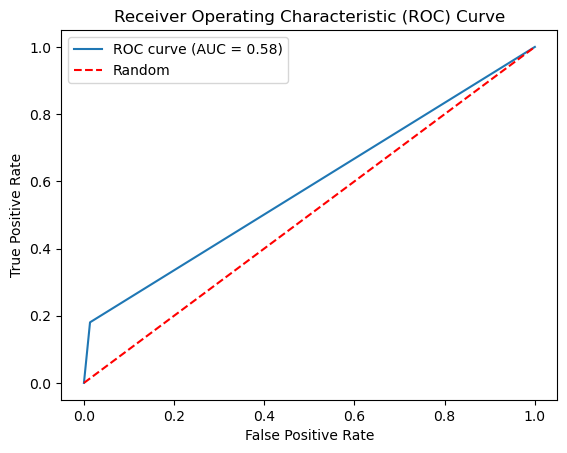

In [89]:
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_value))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [73]:
md = pd.DataFrame({'all m':['logmodel','classifier','classifier1','classifier2','classifier3','classifier4'],
             'acc score' :[accuracy_score(y_val,predictions)*100,
                         accuracy_score(y_val, y_pred)*100,
                         accuracy_score(y_val, y_pred1)*100,
                         accuracy_score(y_val, y_pred2)*100,
                         accuracy_score(y_val, y_pred3)*100,
                         accuracy_score(y_val, y_pred4)*100]})

<AxesSubplot:xlabel='all m', ylabel='acc score'>

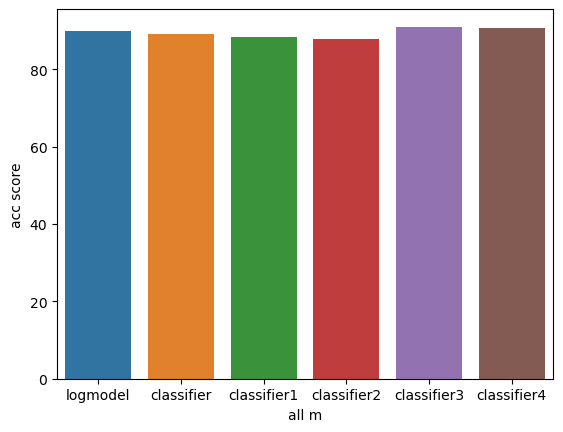

In [75]:
sns.barplot(md['all m'],md['acc score'])

In [90]:
import joblib

In [91]:
joblib.dump(classifier3,'bank')

['bank']

In [92]:
#random forest is best model